In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [2]:
data = np.load("data.npy")

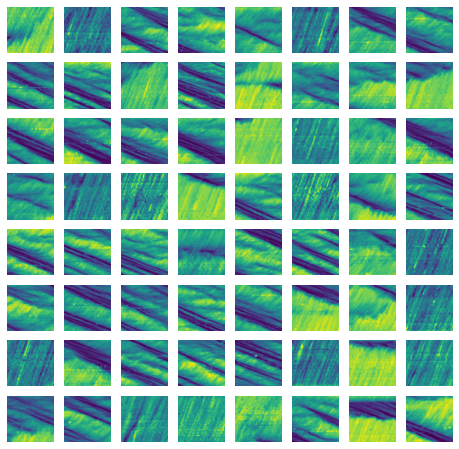

In [3]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(data[np.random.randint(data.shape[0])][0].T, origin="lower" )
        ax[i, j].axis("off")

In [4]:
# Normalize the data with min-max scaling

data_min = 0 # data.min()
data_max = data.max()

data = (data - data_min) / (data_max - data_min)

In [5]:
# Split the data into training and validation sets
train_size = int(0.8 * len(data))
val_size = len(data) - train_size

train_data, val_data = torch.utils.data.random_split(data, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [9]:
class ScoreNet(nn.Module):
    def __init__(self):
        super(ScoreNet, self).__init__()
        self.conv1 = nn.Conv2d(4, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 4, kernel_size=3, stride=1, padding=1)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.conv5(x)
        return x

# Initialize model, optimizer, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ScoreNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

criterion = nn.MSELoss()

In [10]:
def add_noise(data, noise_std):
    noise = torch.randn_like(data) * noise_std
    noisy_data = data + noise
    return noisy_data, noise

# Training loop
num_epochs = 100
noise_std = 0.05

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        noisy_batch, noise = add_noise(batch, noise_std)
        noisy_batch, noise = noisy_batch.to(device), noise.to(device)
        
        optimizer.zero_grad()
        score = model(noisy_batch)
        loss = criterion(score, -noise / (noise_std**2))
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}')

# Save the model after training
torch.save(model.state_dict(), 'scorenet.pth')
print("ScoreNet model saved.")

100%|██████████| 125/125 [00:04<00:00, 27.42it/s]


Epoch 1/100, Loss: 394.0166560058594


100%|██████████| 125/125 [00:04<00:00, 27.74it/s]


Epoch 2/100, Loss: 286.8285701904297


100%|██████████| 125/125 [00:04<00:00, 27.72it/s]


Epoch 3/100, Loss: 188.97894714355468


100%|██████████| 125/125 [00:04<00:00, 27.38it/s]


Epoch 4/100, Loss: 126.24242279052734


100%|██████████| 125/125 [00:04<00:00, 27.36it/s]


Epoch 5/100, Loss: 101.13480755615234


100%|██████████| 125/125 [00:04<00:00, 26.89it/s]


Epoch 6/100, Loss: 97.19318798828125


100%|██████████| 125/125 [00:04<00:00, 27.01it/s]


Epoch 7/100, Loss: 96.02530206298829


100%|██████████| 125/125 [00:04<00:00, 26.62it/s]


Epoch 8/100, Loss: 95.22168255615235


100%|██████████| 125/125 [00:04<00:00, 26.98it/s]


Epoch 9/100, Loss: 94.64306134033203


100%|██████████| 125/125 [00:04<00:00, 26.76it/s]


Epoch 10/100, Loss: 94.02744616699219


100%|██████████| 125/125 [00:04<00:00, 26.48it/s]


Epoch 11/100, Loss: 93.43780883789063


100%|██████████| 125/125 [00:04<00:00, 26.97it/s]


Epoch 12/100, Loss: 92.84310272216797


100%|██████████| 125/125 [00:04<00:00, 26.75it/s]


Epoch 13/100, Loss: 92.18083746337891


100%|██████████| 125/125 [00:04<00:00, 26.53it/s]


Epoch 14/100, Loss: 91.3391283569336


100%|██████████| 125/125 [00:04<00:00, 27.08it/s]


Epoch 15/100, Loss: 90.64391644287109


100%|██████████| 125/125 [00:04<00:00, 27.21it/s]


Epoch 16/100, Loss: 90.00154724121094


100%|██████████| 125/125 [00:04<00:00, 26.93it/s]


Epoch 17/100, Loss: 89.39712890625


100%|██████████| 125/125 [00:04<00:00, 27.29it/s]


Epoch 18/100, Loss: 88.85625756835938


100%|██████████| 125/125 [00:04<00:00, 27.16it/s]


Epoch 19/100, Loss: 88.37279949951171


100%|██████████| 125/125 [00:04<00:00, 27.21it/s]


Epoch 20/100, Loss: 87.93294732666016


100%|██████████| 125/125 [00:04<00:00, 26.31it/s]


Epoch 21/100, Loss: 87.51011059570313


100%|██████████| 125/125 [00:04<00:00, 26.27it/s]


Epoch 22/100, Loss: 87.07753314208985


100%|██████████| 125/125 [00:04<00:00, 26.99it/s]


Epoch 23/100, Loss: 86.7014757080078


100%|██████████| 125/125 [00:04<00:00, 26.56it/s]


Epoch 24/100, Loss: 86.2897314453125


100%|██████████| 125/125 [00:04<00:00, 26.71it/s]


Epoch 25/100, Loss: 85.96150732421874


100%|██████████| 125/125 [00:04<00:00, 26.58it/s]


Epoch 26/100, Loss: 85.6090625


100%|██████████| 125/125 [00:04<00:00, 26.61it/s]


Epoch 27/100, Loss: 85.22882354736328


100%|██████████| 125/125 [00:04<00:00, 26.58it/s]


Epoch 28/100, Loss: 84.94596734619141


100%|██████████| 125/125 [00:04<00:00, 27.07it/s]


Epoch 29/100, Loss: 84.56011773681641


100%|██████████| 125/125 [00:04<00:00, 26.69it/s]


Epoch 30/100, Loss: 84.22157360839844


100%|██████████| 125/125 [00:04<00:00, 26.80it/s]


Epoch 31/100, Loss: 83.85504553222657


100%|██████████| 125/125 [00:04<00:00, 27.28it/s]


Epoch 32/100, Loss: 83.50066967773438


100%|██████████| 125/125 [00:04<00:00, 26.82it/s]


Epoch 33/100, Loss: 83.1540499267578


100%|██████████| 125/125 [00:04<00:00, 26.96it/s]


Epoch 34/100, Loss: 82.81565954589844


100%|██████████| 125/125 [00:04<00:00, 26.65it/s]


Epoch 35/100, Loss: 82.42120013427734


100%|██████████| 125/125 [00:04<00:00, 26.73it/s]


Epoch 36/100, Loss: 82.10445910644532


100%|██████████| 125/125 [00:04<00:00, 26.73it/s]


Epoch 37/100, Loss: 81.75776245117187


100%|██████████| 125/125 [00:04<00:00, 25.94it/s]


Epoch 38/100, Loss: 81.42973022460937


100%|██████████| 125/125 [00:04<00:00, 26.22it/s]


Epoch 39/100, Loss: 81.12703082275391


100%|██████████| 125/125 [00:04<00:00, 26.64it/s]


Epoch 40/100, Loss: 80.80785137939453


100%|██████████| 125/125 [00:04<00:00, 26.25it/s]


Epoch 41/100, Loss: 80.48331866455078


100%|██████████| 125/125 [00:04<00:00, 26.53it/s]


Epoch 42/100, Loss: 80.28053576660156


100%|██████████| 125/125 [00:04<00:00, 26.06it/s]


Epoch 43/100, Loss: 80.03102178955078


100%|██████████| 125/125 [00:04<00:00, 26.67it/s]


Epoch 44/100, Loss: 79.76136846923828


100%|██████████| 125/125 [00:04<00:00, 26.54it/s]


Epoch 45/100, Loss: 79.50774139404297


100%|██████████| 125/125 [00:04<00:00, 25.85it/s]


Epoch 46/100, Loss: 79.31846173095703


100%|██████████| 125/125 [00:04<00:00, 26.70it/s]


Epoch 47/100, Loss: 79.1476328125


100%|██████████| 125/125 [00:04<00:00, 26.56it/s]


Epoch 48/100, Loss: 78.94278033447266


100%|██████████| 125/125 [00:04<00:00, 26.66it/s]


Epoch 49/100, Loss: 78.80502447509765


100%|██████████| 125/125 [00:04<00:00, 26.10it/s]


Epoch 50/100, Loss: 78.62229626464844


100%|██████████| 125/125 [00:04<00:00, 26.53it/s]


Epoch 51/100, Loss: 78.50806646728516


100%|██████████| 125/125 [00:04<00:00, 26.78it/s]


Epoch 52/100, Loss: 78.35840704345704


100%|██████████| 125/125 [00:04<00:00, 26.58it/s]


Epoch 53/100, Loss: 78.23491168212891


100%|██████████| 125/125 [00:04<00:00, 26.36it/s]


Epoch 54/100, Loss: 78.11039593505859


100%|██████████| 125/125 [00:04<00:00, 26.85it/s]


Epoch 55/100, Loss: 78.01959478759765


100%|██████████| 125/125 [00:04<00:00, 26.70it/s]


Epoch 56/100, Loss: 77.92688427734375


100%|██████████| 125/125 [00:04<00:00, 26.82it/s]


Epoch 57/100, Loss: 77.80652264404297


100%|██████████| 125/125 [00:04<00:00, 26.24it/s]


Epoch 58/100, Loss: 77.68929553222657


100%|██████████| 125/125 [00:04<00:00, 26.69it/s]


Epoch 59/100, Loss: 77.58806268310546


100%|██████████| 125/125 [00:04<00:00, 27.17it/s]


Epoch 60/100, Loss: 77.53392498779297


100%|██████████| 125/125 [00:04<00:00, 26.32it/s]


Epoch 61/100, Loss: 77.4688232421875


100%|██████████| 125/125 [00:04<00:00, 26.88it/s]


Epoch 62/100, Loss: 77.35296331787109


100%|██████████| 125/125 [00:04<00:00, 26.95it/s]


Epoch 63/100, Loss: 77.23062109375


100%|██████████| 125/125 [00:04<00:00, 26.37it/s]


Epoch 64/100, Loss: 77.16348840332032


100%|██████████| 125/125 [00:04<00:00, 27.47it/s]


Epoch 65/100, Loss: 77.09812152099609


100%|██████████| 125/125 [00:04<00:00, 26.57it/s]


Epoch 66/100, Loss: 76.99341088867187


100%|██████████| 125/125 [00:04<00:00, 26.49it/s]


Epoch 67/100, Loss: 76.9247875366211


100%|██████████| 125/125 [00:04<00:00, 26.63it/s]


Epoch 68/100, Loss: 76.84304211425781


100%|██████████| 125/125 [00:04<00:00, 26.65it/s]


Epoch 69/100, Loss: 76.80155725097656


100%|██████████| 125/125 [00:04<00:00, 26.73it/s]


Epoch 70/100, Loss: 76.72272869873046


100%|██████████| 125/125 [00:04<00:00, 26.43it/s]


Epoch 71/100, Loss: 76.63079431152343


100%|██████████| 125/125 [00:04<00:00, 26.39it/s]


Epoch 72/100, Loss: 76.59478253173828


100%|██████████| 125/125 [00:04<00:00, 26.53it/s]


Epoch 73/100, Loss: 76.50732464599609


100%|██████████| 125/125 [00:04<00:00, 26.55it/s]


Epoch 74/100, Loss: 76.43650927734375


100%|██████████| 125/125 [00:04<00:00, 26.52it/s]


Epoch 75/100, Loss: 76.38231384277344


100%|██████████| 125/125 [00:04<00:00, 26.65it/s]


Epoch 76/100, Loss: 76.30626495361328


100%|██████████| 125/125 [00:04<00:00, 26.61it/s]


Epoch 77/100, Loss: 76.21526483154297


100%|██████████| 125/125 [00:04<00:00, 26.82it/s]


Epoch 78/100, Loss: 76.17224780273438


100%|██████████| 125/125 [00:04<00:00, 26.73it/s]


Epoch 79/100, Loss: 76.15282580566407


100%|██████████| 125/125 [00:04<00:00, 26.31it/s]


Epoch 80/100, Loss: 76.06515704345703


100%|██████████| 125/125 [00:04<00:00, 26.57it/s]


Epoch 81/100, Loss: 75.9830986328125


100%|██████████| 125/125 [00:04<00:00, 26.59it/s]


Epoch 82/100, Loss: 75.98410223388672


100%|██████████| 125/125 [00:04<00:00, 26.18it/s]


Epoch 83/100, Loss: 75.90101513671875


100%|██████████| 125/125 [00:04<00:00, 26.38it/s]


Epoch 84/100, Loss: 75.83944403076171


100%|██████████| 125/125 [00:04<00:00, 26.39it/s]


Epoch 85/100, Loss: 75.78551818847656


100%|██████████| 125/125 [00:04<00:00, 26.60it/s]


Epoch 86/100, Loss: 75.75186749267579


100%|██████████| 125/125 [00:04<00:00, 26.97it/s]


Epoch 87/100, Loss: 75.72313958740234


100%|██████████| 125/125 [00:04<00:00, 26.69it/s]


Epoch 88/100, Loss: 75.6406567993164


100%|██████████| 125/125 [00:04<00:00, 26.30it/s]


Epoch 89/100, Loss: 75.62087145996094


100%|██████████| 125/125 [00:04<00:00, 26.45it/s]


Epoch 90/100, Loss: 75.56900079345704


100%|██████████| 125/125 [00:04<00:00, 26.80it/s]


Epoch 91/100, Loss: 75.51977307128907


100%|██████████| 125/125 [00:04<00:00, 26.44it/s]


Epoch 92/100, Loss: 75.50812927246093


100%|██████████| 125/125 [00:04<00:00, 26.67it/s]


Epoch 93/100, Loss: 75.4251171875


100%|██████████| 125/125 [00:04<00:00, 27.03it/s]


Epoch 94/100, Loss: 75.39517291259766


100%|██████████| 125/125 [00:04<00:00, 26.76it/s]


Epoch 95/100, Loss: 75.32408447265625


100%|██████████| 125/125 [00:04<00:00, 26.54it/s]


Epoch 96/100, Loss: 75.3216171875


100%|██████████| 125/125 [00:04<00:00, 26.21it/s]


Epoch 97/100, Loss: 75.28417132568359


100%|██████████| 125/125 [00:04<00:00, 26.63it/s]


Epoch 98/100, Loss: 75.23718322753906


100%|██████████| 125/125 [00:04<00:00, 26.24it/s]


Epoch 99/100, Loss: 75.22149755859375


100%|██████████| 125/125 [00:04<00:00, 27.50it/s]

Epoch 100/100, Loss: 75.14621405029297
ScoreNet model saved.


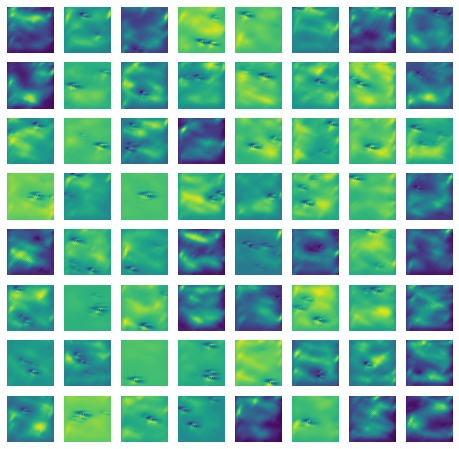

In [20]:
def langevin_dynamics(model, shape, num_steps=40, step_size=0.01, noise_std=0.05):
    model.eval()
    samples = torch.randn(shape).to(device)
    samples.requires_grad = True

    for _ in range(num_steps):
        samples.grad = None
        score = model(samples)
        samples = samples + step_size * score + noise_std * torch.randn_like(samples)

    return samples.detach()

# Generate samples
with torch.no_grad():
    samples = langevin_dynamics(model, (64, 4, 64, 64))
    samples = samples.permute(0, 2, 3, 1).cpu().numpy()

# Plot generated samples
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(samples[i * 8 + j, :, :, 0], origin="lower")
        ax[i, j].axis("off")
plt.show()